## Задание 1

Цель: изучить применение модели логистической регрессии и метода опорных векторов в задаче бинарной классификации.

Целевая переменная – уровень дохода income, который принимает два значения <=50K и >50K, поэтому классификация бинарная.

 Остальные признаки описывают персональную информацию – возраст, образование, семейное положение и т. д. 
 
 Подробное описание признаков и их возможные значения можно получить самостоятельно, используя функции Python3 для анализа датасета (describe, unique и т.д) или прочитать информацию по ссылке.

# Модель логистической регрессии

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns


In [5]:
data = pd.read_csv('adult.csv')
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


Первичный анализ данных

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
data[data['income'] == '?'].count()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Пропуски есть в столбцах 'workclass' -7799 , 'occupation' - 2809, 'native-country' - 857

Так как пропусков достаточно большое число, то заменим их  модой столбца 

In [8]:
mode_value = data.loc[data['workclass'] != '?', 'workclass'].mode()[0]

data['workclass'] = data['workclass'].replace('?', mode_value)
data['workclass'].unique()


array(['Private', 'Local-gov', 'Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [9]:
mode_value = data.loc[data['occupation'] != '?', 'occupation'].mode()[0]
data['occupation'] = data['occupation'].replace('?',mode_value)

data['occupation'].unique()

array(['Machine-op-inspct', 'Farming-fishing', 'Protective-serv',
       'Prof-specialty', 'Other-service', 'Craft-repair', 'Adm-clerical',
       'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv',
       'Transport-moving', 'Handlers-cleaners', 'Armed-Forces'],
      dtype=object)

In [10]:
mode_value = data.loc[data['native-country'] != '?', 'native-country'].mode()[0]
data['native-country'] = data['native-country'].replace('?',mode_value)

data['native-country'].unique()

array(['United-States', 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

Визуализация данных

Посмотрим на распределение данных в столбце income

Text(0.5, 1.0, 'Распределение уровня дохода')

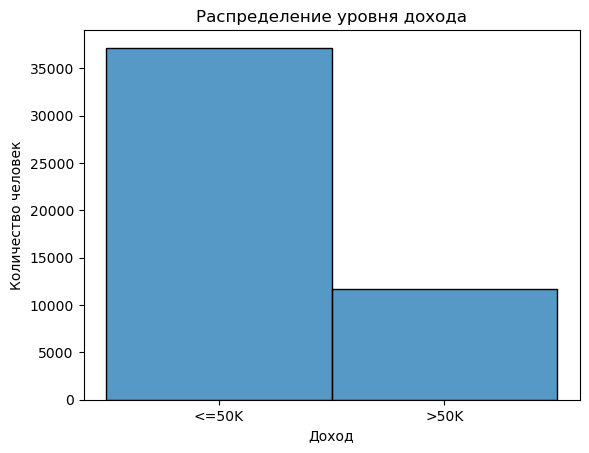

In [11]:
sns.histplot(data=data,x='income')
plt.xlabel('Доход')
plt.ylabel('Количество человек')
plt.title('Распределение уровня дохода')

Посмотрим, кто больше проводит времени на рабочем месте в неделю: люди с уровнем дохода < 50к или люди с большим уровнем дохода

Text(0.5, 1.0, 'Зависимость количества часов в неделю от дохода')

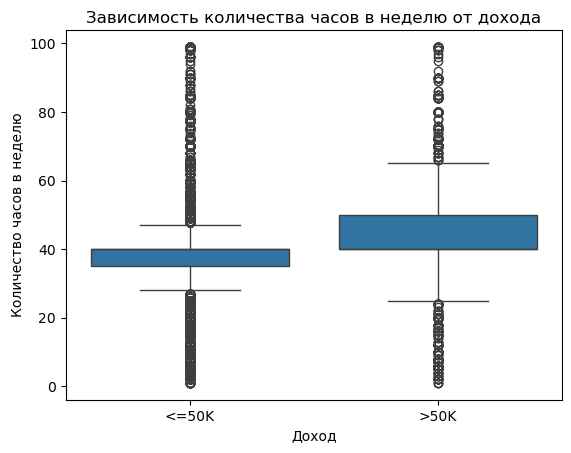

In [12]:
sns.boxplot(data=data,x='income',y='hours-per-week')
plt.xlabel('Доход')
plt.ylabel('Количество часов в неделю')
plt.title('Зависимость количества часов в неделю от дохода')

В среднем работники с уровнем дохода больше 50к проводят на работе на 5-10 часов в неделю больше

Посмотрим, влияет ли уровень образования на размер дохода (в процентах)

Распределение по процентам будет производиться внутри каждого класса обучения 

Text(0.5, 1.0, 'Зависимость дохода от уровня образования')

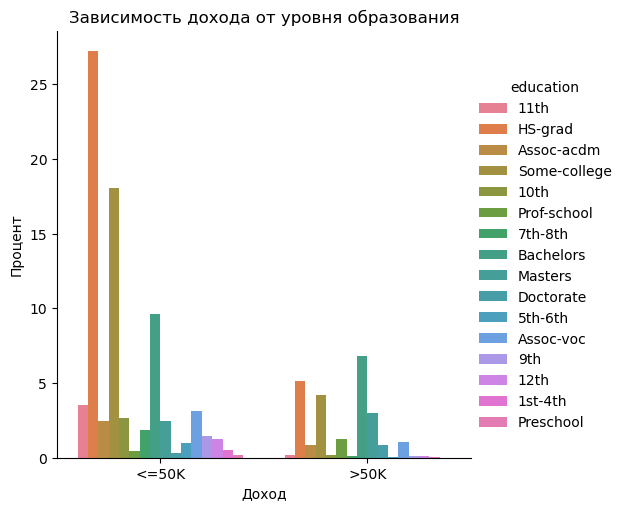

In [13]:

sns.catplot(data=data,x='income', hue='education', kind='count',
    stat='percent')
plt.xlabel('Доход')
plt.ylabel('Процент')
plt.title('Зависимость дохода от уровня образования')


Обучение модели

Обучение модели с помощью алгоритма логистической регресии

In [14]:
selectedColumns = data[['hours-per-week', 'occupation', 'income']]
X = pd.get_dummies(selectedColumns, columns=['occupation'], dtype = 'int', drop_first = True)
del X['income']
X


,hours-per-week,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,40,0,0,0,0,0,1,0,0,0,0,0,0,0
1,50,0,0,0,1,0,0,0,0,0,0,0,0,0
2,40,0,0,0,0,0,0,0,0,0,1,0,0,0
3,40,0,0,0,0,0,1,0,0,0,0,0,0,0
4,30,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,38,0,0,0,0,0,0,0,0,0,0,0,1,0
48838,40,0,0,0,0,0,1,0,0,0,0,0,0,0
48839,40,0,0,0,0,0,0,0,0,0,0,0,0,0
48840,20,0,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [16]:
le.fit(data['income'])

LabelEncoder()

In [17]:
le.classes_
le.transform(['<=50K'])

array([0])

In [18]:
y = pd.Series(data=le.transform(data['income']))


In [19]:
from sklearn.model_selection import train_test_split 

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train.unique()

array([0, 1])

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
model = LogisticRegression()

In [23]:
model.fit(X_train,y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
prediction = model.predict(X_test)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [25]:
model.predict_proba(X_test)

array([[0.95324913, 0.04675087],
       [0.83430111, 0.16569889],
       [0.65964795, 0.34035205],
       ...,
       [0.67797826, 0.32202174],
       [0.8457379 , 0.1542621 ],
       [0.57241007, 0.42758993]])

Оцениваем эффективность модели

In [26]:
result = pd.DataFrame(y_test.reset_index(drop=True), columns = ['true'])
result['pred'] = prediction
result['fault'] = result['true'] - result['pred']
result['fault'].value_counts()



fault
 0    7622
 1    1904
-1     243
Name: count, dtype: int64

Модель неправильно предсказала 2100 из 9769

In [27]:
model.score(X_train,y_train)

0.769124459345328

In [28]:
model.score(X_test,y_test)

0.7802231548776742

Доля правильных ответов для обучающей выборки - 77%, для тестовой - 78%

Обучение модели с помощью алгоритма SVC

In [29]:
from sklearn.svm import SVC

In [30]:
model_svc = SVC(kernel='linear')

In [31]:
model_svc.fit(X_train,y_train)

SVC(kernel='linear')

In [32]:
model_svc.score(X_train,y_train)

0.7595014460113122

In [33]:
model_svc.score(X_test,y_test)

0.7655850138192241

Доля правильных ответов получилась ниже

Изменим ядро в модели SVC

In [34]:
model_svc = SVC(kernel='rbf')

In [35]:
model_svc.fit(X_train,y_train)

SVC()

In [36]:
model_svc.score(X_train,y_train)

0.7595014460113122

In [37]:
model_svc.score(X_test,y_test)

0.7655850138192241

Изменим ядро модели на полиномиальное

In [38]:
model_svc = SVC(kernel='poly',degree=3)

In [39]:
model_svc.fit(X_train,y_train)

SVC(kernel='poly')

In [40]:
model_svc.score(X_train,y_train)

0.7592455148056203

Существенной разницы в точности моделей не было обнаружено

Вывод: были опробованы для классификации данных по уровню дохода две модели - модель логистической регрессии и модель опорных векторов SVC.

Данные модели с достаточно высоким уровнем точности справились с поставленными задачами.